<a href="https://colab.research.google.com/github/aderdouri/ActuarialThesis/blob/master/R/myEMTboost_real_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("TDboost")
#install.packages("caret")
install.packages("ggplot2")
install.packages('reshape2')
install.packages("dplyr")
install.packages('cplm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘biglm’, ‘minqa’, ‘statmod’, ‘tweedie’




In [ ]:
library(tweedie)
library(TDboost)
library(ggplot2)
library(reshape2)
#library(caret)
library(dplyr)
library(cplm)

Loading required package: lattice

Loaded TDboost 1.4



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: coda

Loading required package: Matrix

Loading required package: splines



In [ ]:
url = "https://raw.githubusercontent.com/aderdouri/ActuarialThesis/master/Data/encodedBASEAUTO.csv"
encodedBASEAUTO <- read.csv(url, stringsAsFactors = F, check.names = F)
head(encodedBASEAUTO)

,ACV,SEX,STATUT,AGECOND,K8000,RM,CAR,USAGE_Prive,USAGE_PriveTrajet,USAGE_Professionnel,⋯,SEGM_H,SEGM_M1,SEGM_M2,GARAGE_ClosCollectif,GARAGE_GarageAutre,GARAGE_IndividuelClos,CSP_CSP_50,CSP_CSP_60,CSP_CSP_AUTRE,CHARGE
,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.134929,1,1,-0.4576631,0,-0.09406372,0,0,1,0,⋯,0,0,0,0,1,0,1,0,0,0
2,1.134929,1,0,1.1011655,0,-0.81727943,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,0
3,1.134929,1,1,-1.8131662,0,1.50734251,0,0,1,0,⋯,0,0,0,0,1,0,0,0,1,0
4,1.134929,1,0,0.6267394,0,-0.81727943,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,0
5,1.134929,1,0,-1.2031898,0,1.50734251,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,0
6,1.134929,1,0,-0.2543376,1,-0.81727943,0,1,0,0,⋯,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Lire le encodé dataset BASEAUTO
encodedBASEAUTO <- as.data.frame(encodedBASEAUTO)

#Mettre la variable CHARGE à la première position du dataset(1st column).
encodedBASEAUTO <- encodedBASEAUTO%>%relocate(CHARGE, .before = 'ACV')

In [ ]:
source(
  paste0("https://raw.githubusercontent.com/aderdouri/ActuarialThesis/master/EMTboost/",
  "TDBoost_source_real.R"
  )
)

In [ ]:
source(
  paste0("https://raw.githubusercontent.com/aderdouri/ActuarialThesis/master/EMTboost/",
  "EMTboost_HE_real.R"
  )
)

In [ ]:
list(colnames(encodedBASEAUTO))

[[1]]
 [1] "CHARGE"                "ACV"                   "SEX"                  
 [4] "STATUT"                "AGECOND"               "K8000"                
 [7] "RM"                    "CAR"                   "USAGE_Prive"          
[10] "USAGE_PriveTrajet"     "USAGE_Professionnel"   "USAGE_Tournees"       
[13] "CLA_A"                 "CLA_B"                 "CLA_C"                
[16] "CLA_D"                 "CLA_E"                 "CLA_F"                
[19] "CLA_G"                 "CLA_H"                 "CLA_I"                
[22] "CLA_J"                 "CLA_K"                 "CLA_L"                
[25] "CLA_M"                 "CLA_N"                 "CLA_O"                
[28] "CLA_P"                 "CLA_Q"                 "CLA_R"                
[31] "CLA_S"                 "CLA_T"                 "CLA_U"                
[34] "CLA_V"                 "CLA_W"                 "CLA_X"                
[37] "CLA_Y"                 "CLA_Z"                 "ALI_CAR"              
[40] "ALI_ELC"               "ALI_IDS"               "ALI_INJ"              
[43] "ALI_INS"               "ENE_EL"                "ENE_ES"               
[46] "ENE_GO"                "VIT_001-130"           "VIT_130-140"          
[49] "VIT_140-150"           "VIT_150-160"           "VIT_160-170"          
[52] "VIT_170-180"           "VIT_180-190"           "VIT_190-200"          
[55] "VIT_200-220"           "VIT_S220"              "SEGM_0"               
[58] "SEGM_A"                "SEGM_B"                "SEGM_H"               
[61] "SEGM_M1"               "SEGM_M2"               "GARAGE_ClosCollectif" 
[64] "GARAGE_GarageAutre"    "GARAGE_IndividuelClos" "CSP_CSP_50"           
[67] "CSP_CSP_60"            "CSP_CSP_AUTRE"

[1] "Replication 1"
---
 This function may take some time to complete;
 Please be patient.  If it fails, try using  method="series"
 rather than the default  method="inversion"
 Another possible reason for failure is the range of p:
 Try a different input for  p.vec
---


Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


1.2 1.25 1.3 1.35 1.4 1.45 1.5 1.55 1.6 
p = 1.2
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 72
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 1179.243 )
* Computing the log-likelihood (method = series ): Done: L = -1644.063 
p = 1.25
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 32
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 1115.539 )
* Computing the log-likelihood (method = series ): Done: L = -1597.15 
p = 1.3
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 43
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 970.3948 )
* Computing the log-likelihood (method = series ): Done: L = -1542.04 
p = 1.35
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 57
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 838.6431 )
* Computing the log-likelihood (method = series ): Done: L = -1503.176 
p = 1.4
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 36
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 766.7208 )
* Computing the log-likelihood (method = series ): Done: L = -1490.737 
p = 1.45
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 78
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 642.4867 )
* Computing the log-likelihood (method = series ): Done: L = -1461.856 
p = 1.5
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 61
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 584.2088 )
* Computing the log-likelihood (method = series ): Done: L = -1457.226 
p = 1.55
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 78
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 509.7167 )
* Computing the log-likelihood (method = series ): Done: L = -1446.144 
p = 1.6
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 74
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 468.2545 )
* Computing the log-likelihood (method = series ): Done: L = -1446.753 
 Some values of L are infinite or NA, and hence ignored
 Done
 Finding maximum likelihood estimates:   Done
ML Estimates:   p = 1.55  with phi= 509.7167  giving L= -1446.144 
 ---

[1] "The estimated rho is: 1.55"
[1] "The estimated phi is: 509.716663201243"
[1] "rho: 1.3"
[1] "initial mu: 63.3097265610582"
[1] "initial phi: 1055.13815215765"
[1] "initial q: 0.976314645806171"
[1] "initial log-likelihood: -1870.77708036526"
[1] "step 1"
[1] "current phi 703.265909258911"
[1] "current q 0.953741324727874"
[1] "current log-likelihood: -1770.28104938011"
[1] "step 2"
[1] "current phi 696.873136194756"
[1] "current q 0.932456440865208"
[1] "current log-likelihood: -1725.86976182118"
[1] "step 3"
[1] "current phi 717.398414717625"
[1] "current q 0.912240117287016"
[1] "current log-likelihood: -1707.14745217581"
[1] "step 4"
[1] "curren

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


1.2 1.25 1.3 1.35 1.4 1.45 1.5 1.55 1.6 
p = 1.2
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 75
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 842.7371 )
* Computing the log-likelihood (method = series ): Done: L = -1355.357 
p = 1.25
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 110
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 744.4764 )
* Computing the log-likelihood (method = series ): Done: L = -1306.289 
p = 1.3
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 109
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 666.1426 )
* Computing the log-likelihood (method = series ): Done: L = -1282.445 
p = 1.35
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 54
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 636.3165 )
* Computing the log-likelihood (method = series ): Done: L = -1285.899 
p = 1.4
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 97
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 549.1567 )
* Computing the log-likelihood (method = series ): Done: L = -1266.06 
p = 1.45
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 56
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 527.7406 )
* Computing the log-likelihood (method = series ): Done: L = -1274.533 
p = 1.5
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 72
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 479.8736 )
* Computing the log-likelihood (method = series ): Done: L = -1271.443 
p = 1.55
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 112
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 425.2905 )
* Computing the log-likelihood (method = series ): Done: L = -1264.962 
p = 1.6
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

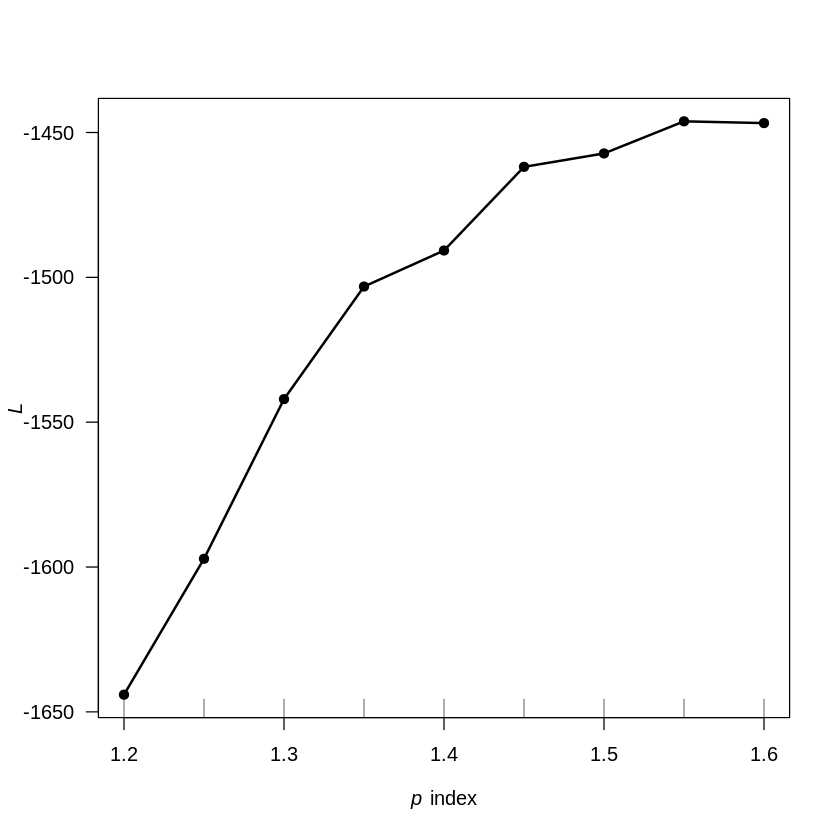

[1] 117
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 398.5998 )
* Computing the log-likelihood (method = series ): Done: L = -1269.06 
 Some values of L are infinite or NA, and hence ignored


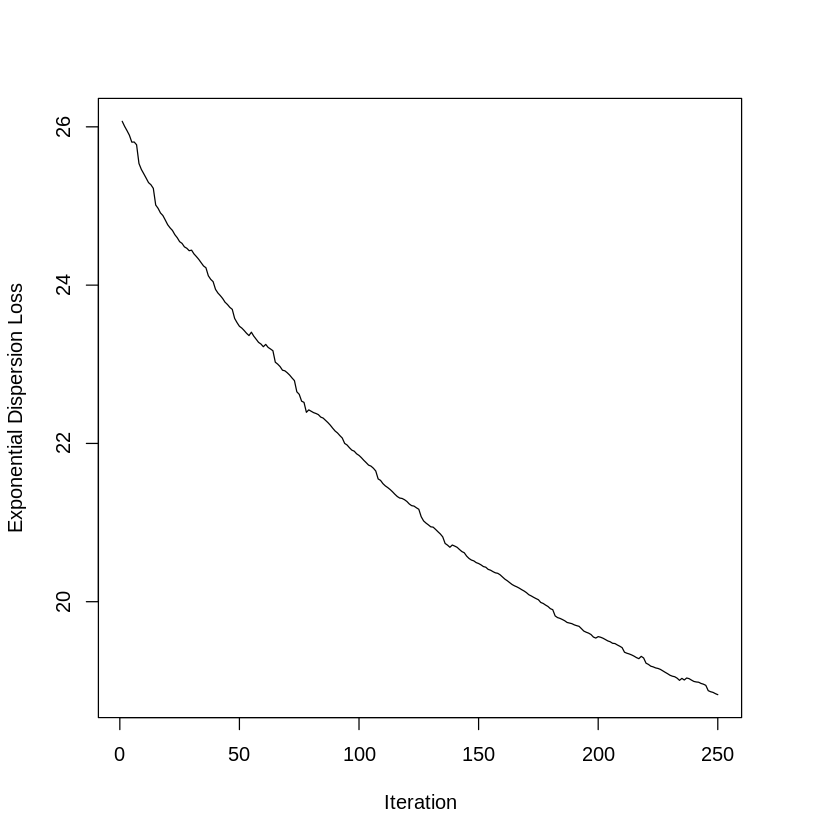

 Done
 Finding maximum likelihood estimates:   Done
ML Estimates:   p = 1.55  with phi= 425.2905  giving L= -1264.962 
 ---

[1] "The estimated rho is: 1.55"
[1] "The estimated phi is: 425.290470942954"
[1] "rho: 1.3"
[1] "initial mu: 32.4145317738259"
[1] "initial phi: 758.986793006776"
[1] "initial q: 0.978888410168031"
[1] "initial log-likelihood: -1605.61867549917"
[1] "step 1"
[1] "current phi 480.591969529607"
[1] "current q 0.958652759022564"
[1] "current log-likelihood: -1498.89966640222"
[1] "step 2"
[1] "current phi 499.158669257122"
[1] "current q 0.939310017379948"
[1] "current log-likelihood: -1472.21904626977"
[1] "step 3"
[1] "current phi 501.318068153769"
[1] "current q 0.920754635423331"
[1] "current log-likelihood: -1447.33363432252"
[1] "step 4"
[1] "current phi 489.400403681299"
[1] "current q 0.902999154147549"
[1] "current log-likelihood: -1420.32586732986"
[1] "step 5"
[1] "current phi 496.186942698061"
[1] "current q 0.885820560522244"
[1] "current log-likelihoo

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


1.2 1.25 1.3 1.35 1.4 1.45 1.5 1.55 1.6 
p = 1.2
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 90
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 746.5694 )
* Computing the log-likelihood (method = series ): Done: L = -1435.357 
p = 1.25
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 62
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 697.0691 )
* Computing the log-likelihood (method = series ): Done: L = -1410.881 
p = 1.3
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 56
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 632.5372 )
* Computing the log-likelihood (method = series ): Done: L = -1390.773 
p = 1.35
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 109
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 541.9916 )
* Computing the log-likelihood (method = series ): Done: L = -1362.064 
p = 1.4
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 107
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 491.9489 )
* Computing the log-likelihood (method = series ): Done: L = -1356.877 
p = 1.45
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 116
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 448.7005 )
* Computing the log-likelihood (method = series ): Done: L = -1355.066 
p = 1.5
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 146
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 401.8001 )
* Computing the log-likelihood (method = series ): Done: L = -1350.549 
p = 1.55
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 135
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 377.1753 )
* Computing the log-likelihood (method = series ): Done: L = -1356.515 
p = 1.6
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

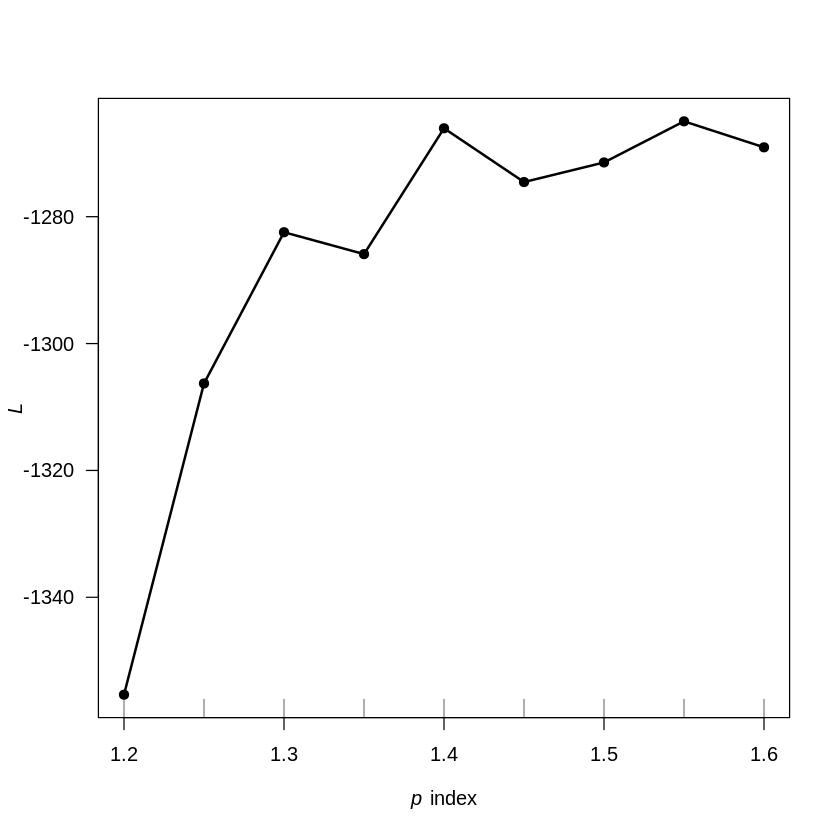

[1] 103
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 369.4642 )
* Computing the log-likelihood (method = series ): Done: L = -1369.532 
 Some values of L are infinite or NA, and hence ignored


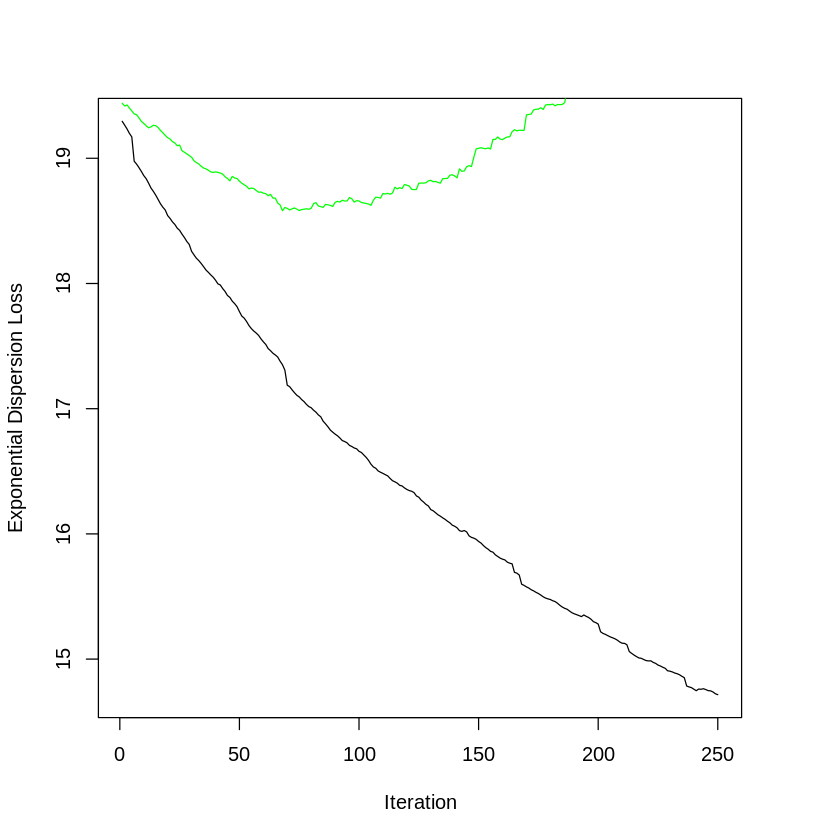

 Done
 Finding maximum likelihood estimates:   Done
ML Estimates:   p = 1.5  with phi= 401.8001  giving L= -1350.549 
 ---

[1] "The estimated rho is: 1.5"
[1] "The estimated phi is: 401.800115902263"
[1] "rho: 1.3"
[1] "initial mu: 31.2379477909216"
[1] "initial phi: 670.016862496753"
[1] "initial q: 0.976688453159041"
[1] "initial log-likelihood: -1708.78947965461"
[1] "step 1"
[1] "current phi 445.904682626757"
[1] "current q 0.954441858459299"
[1] "current log-likelihood: -1608.27140102672"
[1] "step 2"
[1] "current phi 447.895883970894"
[1] "current q 0.933394418251847"
[1] "current log-likelihood: -1568.96182338838"
[1] "step 3"
[1] "current phi 455.555571182032"
[1] "current q 0.91335440293319"
[1] "current log-likelihood: -1546.21250646288"
[1] "step 4"
[1] "current phi 457.616158106216"
[1] "current q 0.894301169232457"
[1] "current log-likelihood: -1526.15478130438"
[1] "step 5"
[1] "current phi 466.971895604153"
[1] "current q 0.875968693509975"
[1] "current log-likelihood: 

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


1.2 1.25 1.3 1.35 1.4 1.45 1.5 1.55 1.6 
p = 1.2
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 51
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 1027.77 )
* Computing the log-likelihood (method = series ): Done: L = -1460.265 
p = 1.25
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 37
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 941.5927 )
* Computing the log-likelihood (method = series ): Done: L = -1420.035 
p = 1.3
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 17
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 861.0537 )
* Computing the log-likelihood (method = series ): Done: L = -1398.006 
p = 1.35
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 25
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 759.8724 )
* Computing the log-likelihood (method = series ): Done: L = -1375.244 
p = 1.4
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 48
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 666.2577 )
* Computing the log-likelihood (method = series ): Done: L = -1358.135 
p = 1.45
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 68
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 588.699 )
* Computing the log-likelihood (method = series ): Done: L = -1347.576 
p = 1.5
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 59
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 538.5496 )
* Computing the log-likelihood (method = series ): Done: L = -1346.882 
p = 1.55
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 37
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 509.1991 )
* Computing the log-likelihood (method = series ): Done: L = -1352.993 
p = 1.6
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

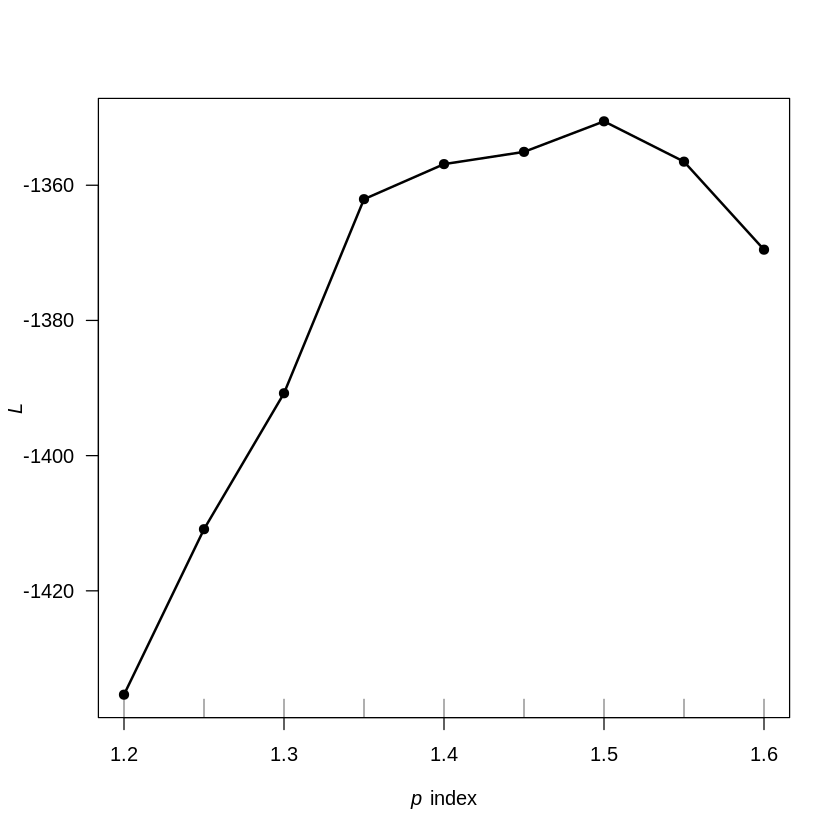

[1] 32
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 479.642 )
* Computing the log-likelihood (method = series ): Done: L = -1357.97 
 Some values of L are infinite or NA, and hence ignored


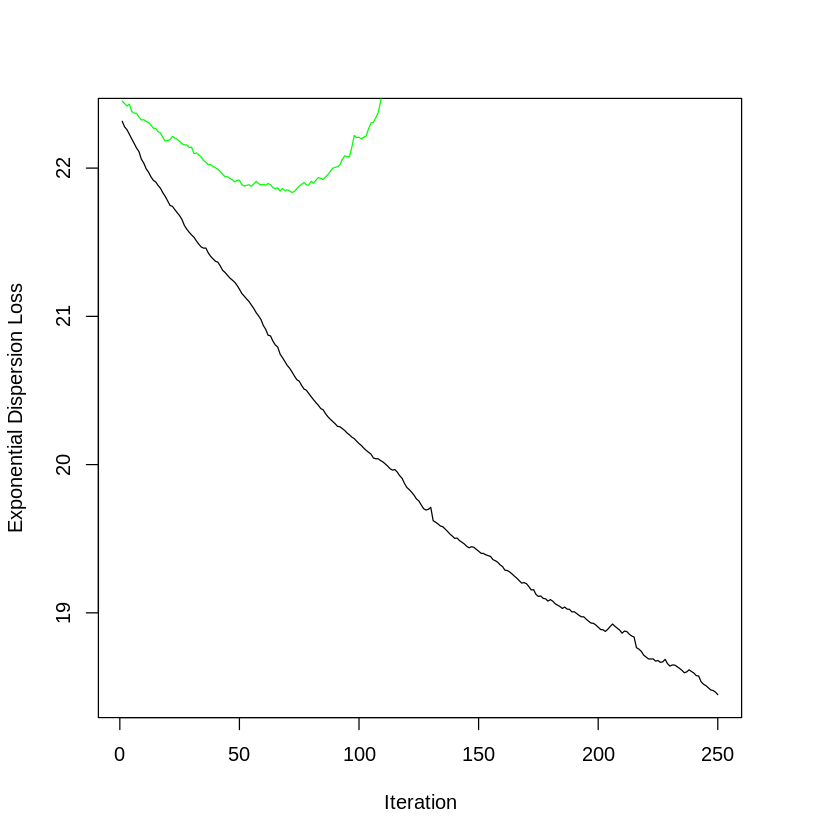

 Done
 Finding maximum likelihood estimates:   Done
ML Estimates:   p = 1.5  with phi= 538.5496  giving L= -1346.882 
 ---

[1] "The estimated rho is: 1.5"
[1] "The estimated phi is: 538.549580625201"
[1] "rho: 1.3"
[1] "initial mu: 43.6458055273368"
[1] "initial phi: 880.067387479477"
[1] "initial q: 0.977660972404731"
[1] "initial log-likelihood: -1693.23104972599"
[1] "step 1"
[1] "current phi 600.564366810374"
[1] "current q 0.956302990628399"
[1] "current log-likelihood: -1606.06590736065"
[1] "step 2"
[1] "current phi 609.687651897395"
[1] "current q 0.936096098686939"
[1] "current log-likelihood: -1572.18659559356"
[1] "step 3"
[1] "current phi 611.680445331124"
[1] "current q 0.917076771190981"
[1] "current log-likelihood: -1546.24484862326"
[1] "step 4"
[1] "current phi 622.278325210626"
[1] "current q 0.898765350800794"
[1] "current log-likelihood: -1531.28654875016"
[1] "step 5"
[1] "current phi 622.070718426775"
[1] "current q 0.881501167796163"
[1] "current log-likelihood:

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


1.2 1.25 1.3 1.35 1.4 1.45 1.5 1.55 1.6 
p = 1.2
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 11
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 1210.13 )
* Computing the log-likelihood (method = series ): Done: L = -1481.548 
p = 1.25
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 44
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 1055.716 )
* Computing the log-likelihood (method = series ): Done: L = -1422.961 
p = 1.3
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 25
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 950.8446 )
* Computing the log-likelihood (method = series ): Done: L = -1398.25 
p = 1.35
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 3
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 872.0571 )
* Computing the log-likelihood (method = series ): Done: L = -1388.618 
p = 1.4
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 40
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 746.8885 )
* Computing the log-likelihood (method = series ): Done: L = -1366.215 
p = 1.45
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 35
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 676.3249 )
* Computing the log-likelihood (method = series ): Done: L = -1362.055 
p = 1.5
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 47
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 598.6563 )
* Computing the log-likelihood (method = series ): Done: L = -1354.974 
p = 1.55
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 7
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 573.3545 )
* Computing the log-likelihood (method = series ): Done: L = -1364.093 
p = 1.6
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

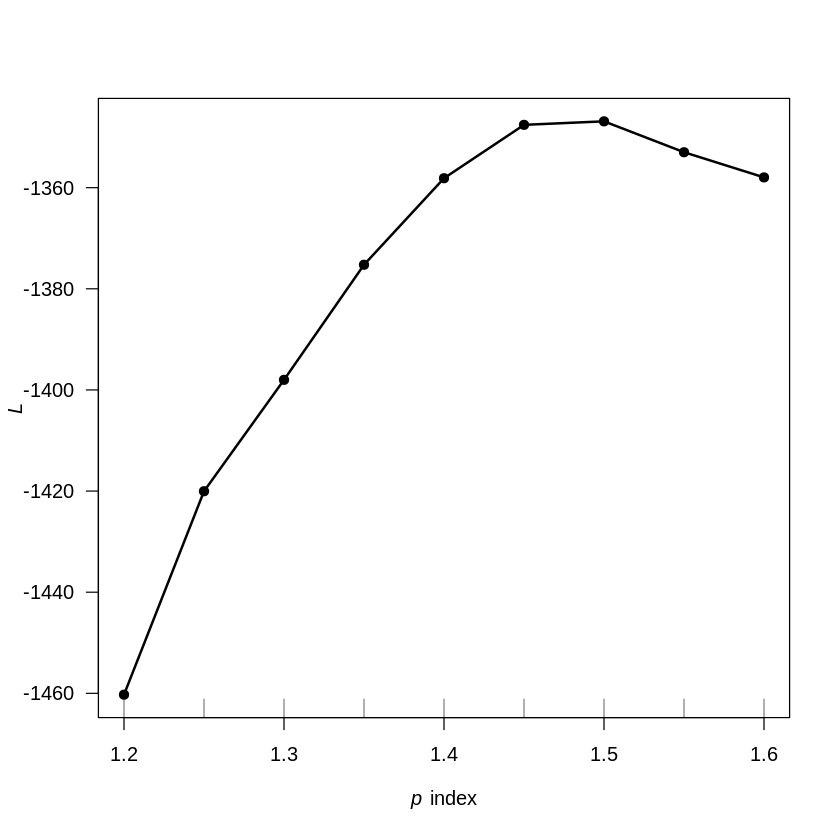

[1] 7
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 530.4966 )
* Computing the log-likelihood (method = series ): Done: L = -1366.448 
 Some values of L are infinite or NA, and hence ignored


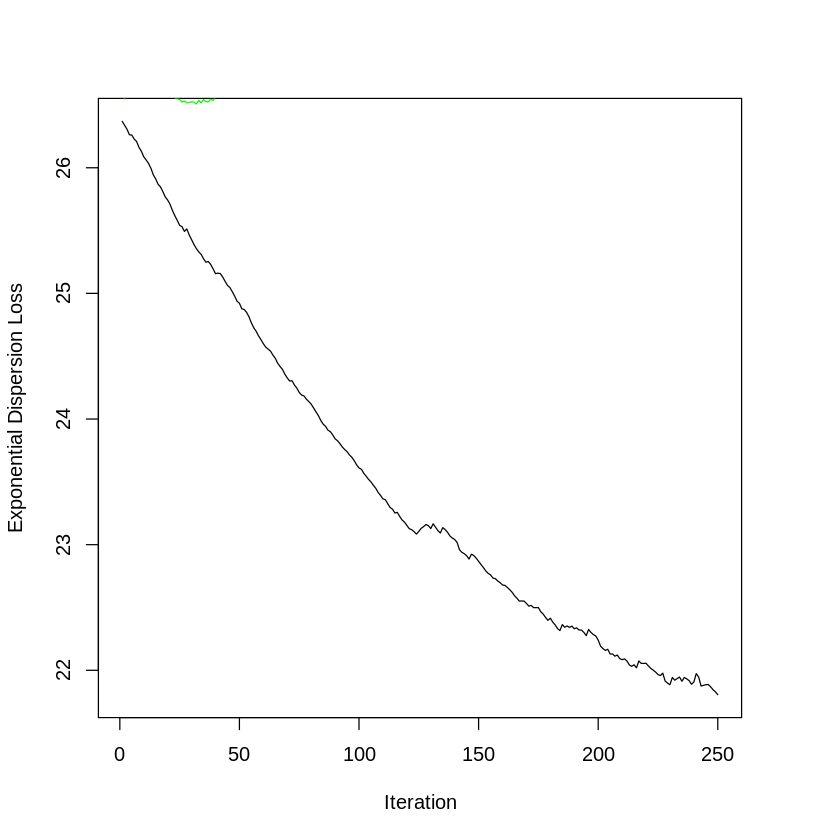

 Done
 Finding maximum likelihood estimates:   Done
ML Estimates:   p = 1.5  with phi= 598.6563  giving L= -1354.974 
 ---

[1] "The estimated rho is: 1.5"
[1] "The estimated phi is: 598.656345497488"
[1] "rho: 1.3"
[1] "initial mu: 50.384515572144"
[1] "initial phi: 981.082496082699"
[1] "initial q: 0.977836295808646"
[1] "initial log-likelihood: -1694.41592701378"
[1] "step 1"
[1] "current phi 659.049894656675"
[1] "current q 0.95663837843237"
[1] "current log-likelihood: -1603.3917180436"
[1] "step 2"
[1] "current phi 678.486770021118"
[1] "current q 0.936645659314736"
[1] "current log-likelihood: -1573.74353612911"
[1] "step 3"
[1] "current phi 678.453322948064"
[1] "current q 0.917574366384942"
[1] "current log-likelihood: -1547.05830999463"
[1] "step 4"
[1] "current phi 673.331695882463"
[1] "current q 0.899387176433418"
[1] "current log-likelihood: -1524.49920165595"
[1] "step 5"
[1] "current phi 692.639557418722"
[1] "current q 0.881986746291956"
[1] "current log-likelihood: -1

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


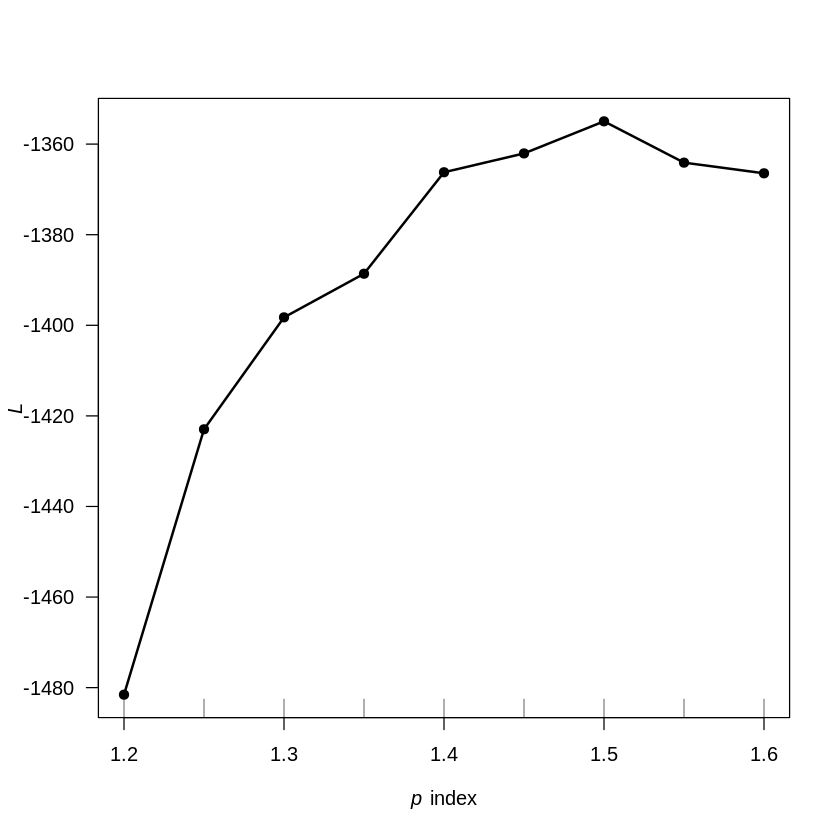

1.2 1.25 1.3 1.35 1.4 1.45 1.5 1.55 1.6 
p = 1.2
* Fitting initial model:[1] 173
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 938.3275 )
* Computing the log-likelihood (method = series ): Done: L = -1513.153 
p = 1.25
* Fitting initial model:[1] 100
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 901.5549 )
* Computing the log-likelihood (method = series ): Done: L = -1478.35 
p = 1.3
* Fitting initial model:[1] 48
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 868.6275 )
* Computing the log-likelihood (method = series ): Done: L = -1463.334 
p = 1.35
* Fitting initial model:[1] 65
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 755.2668 )
* Computing the log-likelihood (method = series ): Done: L = -1427.153 
p = 1.4
* Fitting initial model:[1] 74
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 666.9947 )
* Computing the log-likelihood (method = series ): Done: L = -1405.872 
p = 1.

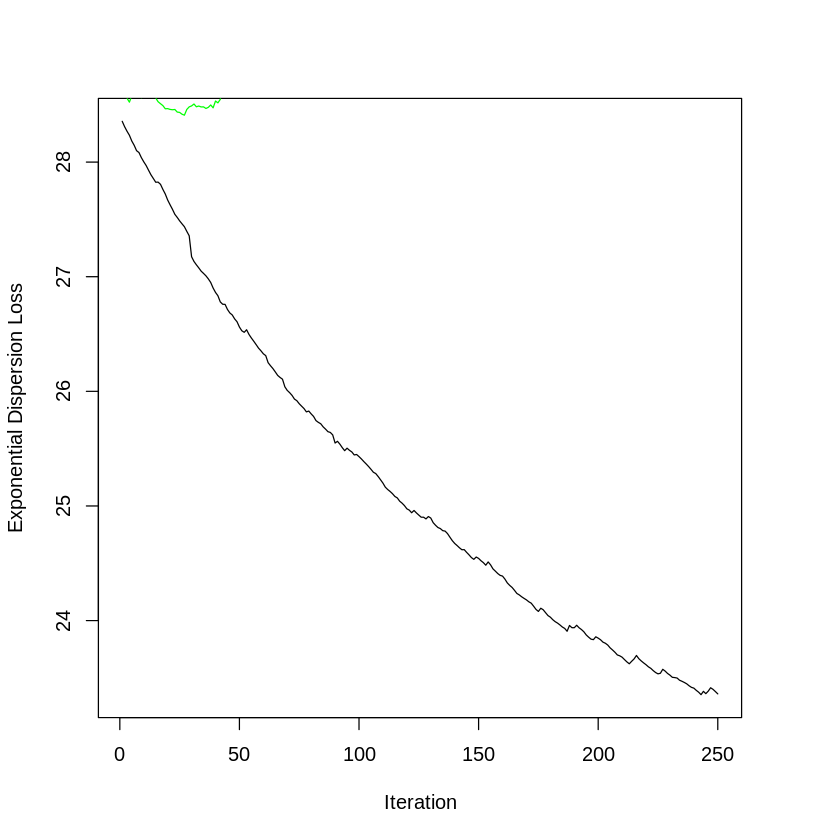

 Done
 Finding maximum likelihood estimates:   Done
ML Estimates:   p = 1.45  with phi= 536.7864  giving L= -1369.49 
 ---

[1] "The estimated rho is: 1.45"
[1] "The estimated phi is: 536.78644366447"
[1] "rho: 1.3"
[1] "initial mu: 50.7592677169012"
[1] "initial phi: 941.297041715923"
[1] "initial q: 0.977054195804196"
[1] "initial log-likelihood: -1782.73720280031"
[1] "step 1"
[1] "current phi 575.418160196339"
[1] "current q 0.955148555443788"
[1] "current log-likelihood: -1659.36594778151"
[1] "step 2"
[1] "current phi 633.244591750634"
[1] "current q 0.934270175869627"
[1] "current log-likelihood: -1649.68199421382"
[1] "step 3"
[1] "current phi 624.514861031513"
[1] "current q 0.914674576856086"
[1] "current log-likelihood: -1617.60406843657"
[1] "step 4"
[1] "current phi 604.452019524041"
[1] "current q 0.895858111108842"
[1] "current log-likelihood: -1586.17034450924"
[1] "step 5"
[1] "current phi 653.924925688902"
[1] "current q 0.877714877775417"
[1] "current log-likelihood:

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


1.2 1.25 1.3 1.35 1.4 1.45 1.5 1.55 1.6 
p = 1.2
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 24
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 915.6147 )
* Computing the log-likelihood (method = series ): Done: L = -1636.438 
p = 1.25
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 85
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 784.1681 )
* Computing the log-likelihood (method = series ): Done: L = -1540.189 
p = 1.3
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 39
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 735.6881 )
* Computing the log-likelihood (method = series ): Done: L = -1512.483 
p = 1.35
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 86
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 622.7809 )
* Computing the log-likelihood (method = series ): Done: L = -1465.493 
p = 1.4
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 78
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 563.4182 )
* Computing the log-likelihood (method = series ): Done: L = -1449.837 
p = 1.45
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 76
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 518.1687 )
* Computing the log-likelihood (method = series ): Done: L = -1443.134 
p = 1.5
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 94
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 434.79 )
* Computing the log-likelihood (method = series ): Done: L = -1418.794 
p = 1.55
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

[1] 37
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 450.5029 )
* Computing the log-likelihood (method = series ): Done: L = -1441.521 
p = 1.6
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = 

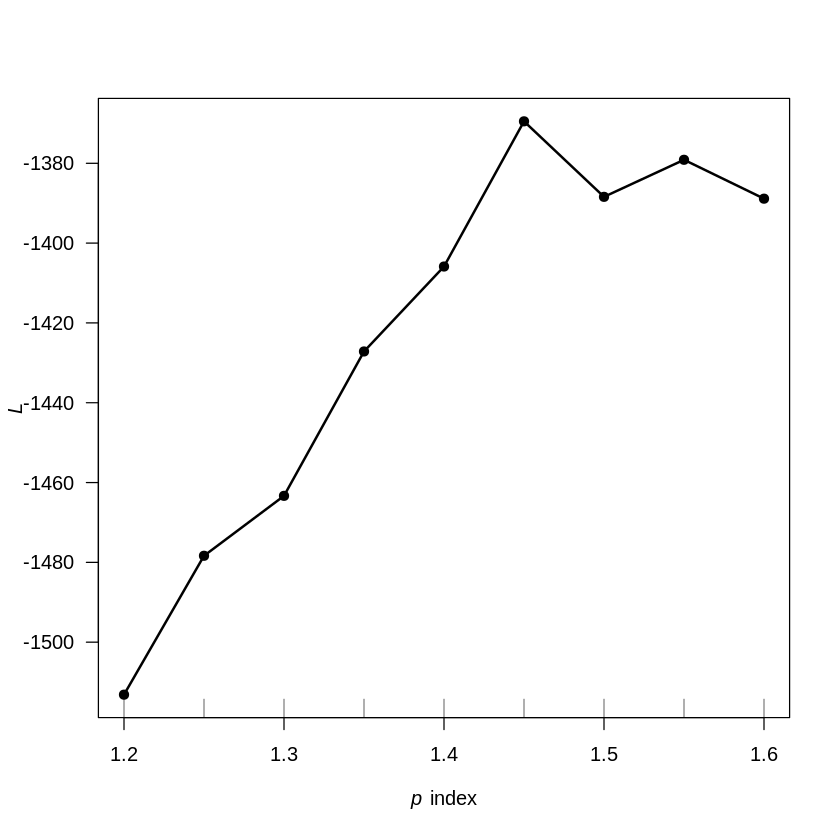

[1] 67
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 389.3164 )
* Computing the log-likelihood (method = series ): Done: L = -1427.925 
 Some values of L are infinite or NA, and hence ignored


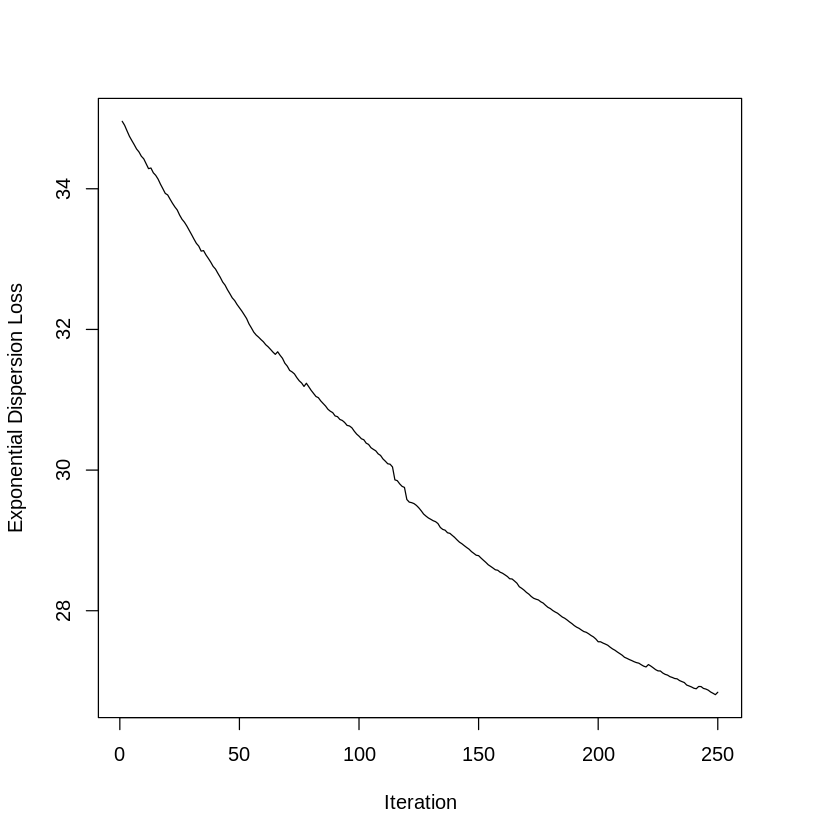

 Done
 Finding maximum likelihood estimates:   Done
ML Estimates:   p = 1.5  with phi= 434.79  giving L= -1418.794 
 ---

[1] "The estimated rho is: 1.5"
[1] "The estimated phi is: 434.790049806118"
[1] "rho: 1.3"
[1] "initial mu: 42.6161957639292"
[1] "initial phi: 810.550259148011"
[1] "initial q: 0.976337667874654"
[1] "initial log-likelihood: -1853.01761563319"
[1] "step 1"
[1] "current phi 537.926145359442"
[1] "current q 0.953778552878861"
[1] "current log-likelihood: -1749.83770842825"
[1] "step 2"
[1] "current phi 553.348209258757"
[1] "current q 0.932203645072534"
[1] "current log-likelihood: -1716.88420147333"
[1] "step 3"
[1] "current phi 547.594675990193"
[1] "current q 0.911755031421274"
[1] "current log-likelihood: -1684.04435135497"
[1] "step 4"
[1] "current phi 558.952380736069"
[1] "current q 0.892204054972209"
[1] "current log-likelihood: -1668.71232612138"
[1] "step 5"
[1] "current phi 564.247713052738"
[1] "current q 0.873680380003755"
[1] "current log-likelihood: -

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


1.2 1.25 1.3 1.35 1.4 1.45 1.5 1.55 1.6 
p = 1.2
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE

[1] 23
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 1112.718 )
* Computing the log-likelihood (method = series ): Done: L = -1610.802 
p = 1.25
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE

[1] 57
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 978.3941 )
* Computing the log-likelihood (method = series ): Done: L = -1524.7 
p = 1.3
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE

[1] 58
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 874.2442 )
* Computing the log-likelihood (method = series ): Done: L = -1476.197 
p = 1.35
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE

[1] 10
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 843.3001 )
* Computing the log-likelihood (method = series ): Done: L = -1466.095 
p = 1.4
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE

[1] 26
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 732.6296 )
* Computing the log-likelihood (method = series ): Done: L = -1433.908 
p = 1.45
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE

[1] 58
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 619.5233 )
* Computing the log-likelihood (method = series ): Done: L = -1403.981 
p = 1.5
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE

[1] 18
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 605.5245 )
* Computing the log-likelihood (method = series ): Done: L = -1410.958 
p = 1.55
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE

[1] 42
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 531.1181 )
* Computing the log-likelihood (method = series ): Done: L = -1397.011 
p = 1.6
* Fitting initial model:

Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 39: ALI_ELC has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 43: ENE_EL has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE][i, , drop = FALSE], y[i.train][i], :
“variable 36: CLA_Y has no variation.”
Warning message in TDboost.fit(x[i.train, , drop = FALSE

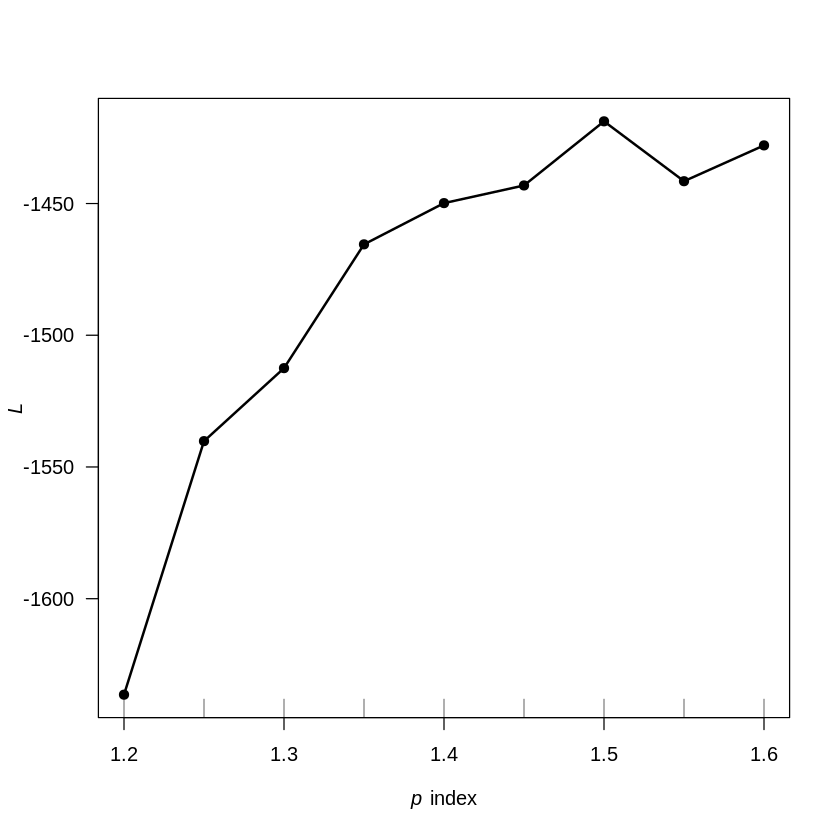

[1] 48
 Done
* Phi estimation, method:  mle (using optimize):  Done (phi = 489.0554 )
* Computing the log-likelihood (method = series ): Done: L = -1394.352 
 Some values of L are infinite or NA, and hence ignored


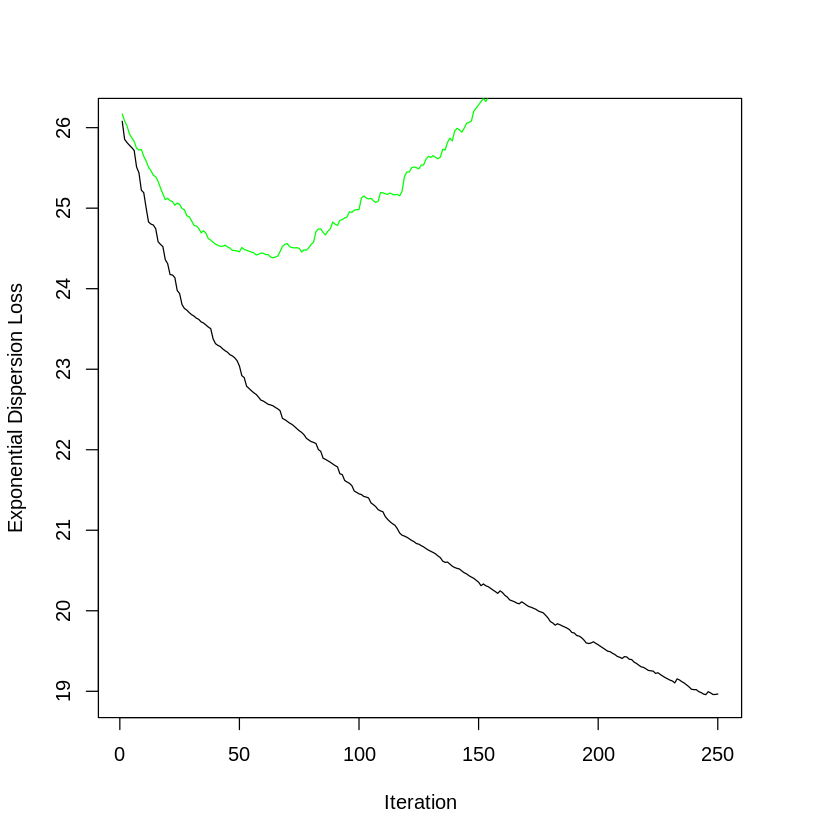

 Done
 Finding maximum likelihood estimates:   Done
ML Estimates:   p = 1.6  with phi= 489.0554  giving L= -1394.352 
 ---

[1] "The estimated rho is: 1.6"
[1] "The estimated phi is: 489.055386000013"


In [ ]:
#############################################
## Undersampling the nonzeros in real data ##
## to generate a new dataset               ##
#load("dat_clean.rda")
dat <- encodedBASEAUTO
zero.index <- which(dat$CHARGE==0)
zero.num <- length(zero.index)
nonzero.index <- which(dat$CHARGE!=0)
nonzero.num <- length(nonzero.index)
zero.data <- dat[zero.index,]
nonzero.data <- dat[nonzero.index,]
over.para <- 1
zero.over.num <- ceiling(zero.num*over.para)
under.para <- 0.15 # Undersampling fraction
nonzero.under.num <- ceiling(nonzero.num*under.para)
zero.percentage <- zero.over.num/(zero.over.num+nonzero.under.num)

nrep <- 10
## For saving the parameters
rho_TD_list <- phi_TD_list <- rho_EMT_list <- phi_EMT_list <- q_EMT_list <- array(NA,dim=c(nrep,2))

## For performance comparison

MAE.list <- GINI.list <- array(NA,dim=c(nrep,2))
gini_matrix.list <- array(NA,dim=c(nrep,2,2))
gini_select.list <- rep(NA,times=nrep)
model.list <- c("TDboost", "EMTboost")

myDataFramesList <- vector(mode='list', length=nrep)

for (i in 1:nrep)
{
  print(paste("Replication",i))

  #####################################
  ## Generate dataset from real data ##
  under.nonzero.index <- sample(nonzero.index,nonzero.under.num,replace=TRUE)
  over.zero.index <- sample(zero.index,zero.over.num,replace=TRUE)
  U <- sample(c(0,1),size=nonzero.under.num,replace=TRUE,prob=c(0.5,0.5))
  train.nonzero.index <- under.nonzero.index[which(U==0)]
  test.nonzero.index <- under.nonzero.index[which(U==1)]
  V <- sample(c(0,1),size=zero.over.num,replace=TRUE,prob=c(0.5,0.5))
  train.zero.index <- over.zero.index[which(V==0)]
  test.zero.index <- over.zero.index[which(V==1)]
  train.data <- dat[c(train.nonzero.index,train.zero.index),]
  test.data <- dat[c(test.nonzero.index,test.zero.index),]

  loss <- test.data$CHARGE
  N <- length(loss)


  ###############
  ## TDboost   ##
  ################################################
  ## estimating phi, rho via profile likelihood ##
  TD_out <- TDboost.profile.real(#CHARGE ~ AGECOND+RM+ACV,    # formula
                                 CHARGE ~ . - CHARGE,         # formula, consider all variables
                                 data=train.data,
                                 p.vec=seq(1.2,1.6,0.05),
                                 verbose=2,
                                 phi.method="mle",
                                 n.trees=250,
                                 do.plot=TRUE,
                                 method="series",
                                 verbose1=FALSE,
                                 do.smooth=FALSE)

  rho_TD.star <- TD_out$p.max
  print(paste('The estimated rho is:',rho_TD.star))
  rho_TD_list[i] <- rho_TD.star

  phi_TD.star <- TD_out$phi.max
  print(paste('The estimated phi is:',phi_TD.star))
  phi_TD_list[i] <- phi_TD.star

  #######################################
  ## TDboost: using the estimated rho  ##
  TD_m <- TDboost(CHARGE ~ AGECOND+RM+ACV,
                  data = train.data,
                  distribution = list(name="EDM",alpha=rho_TD.star),
                  shrinkage = 0.005,
                  n.trees = 250,
                  interaction.depth = 7,
                  bag.fraction = 0.5,
                  n.minobsinnode = 20,
                  keep.data = FALSE,
                  cv.folds = 5,
                  verbose = FALSE)

  best.iter <- TDboost.perf(TD_m, method="cv", plot.it = TRUE)
  pred_mu_TD <- predict.TDboost(TD_m, test.data, best.iter)
  pred_f_TD <- predict.TDboost(TD_m, test.data, best.iter, type='link')


  ################
  ## EMTboost   ##
  ###########################################################
  ## Senerio 3: estimating phi, rho via profile likelihood ##
  rho.list <- seq(1.3,1.7,0.05)
  EMT_out <- EMTboost.profile_real(train.dat=train.data,
                                   test.dat=test.data,
                                   rho.list=rho.list,
                                   maxsteps=20,
                                   verbose=TRUE,
                                   plot.it=FALSE,
                                   shrinkage = 0.005,
                                   n.trees = 250,
                                   interaction.depth = 7,
                                   bag.fraction = 0.5,
                                   n.minobsinnode = 20,
                                   cv.folds = 5)

  #  Optimal rho
  rho_EMT.star <- EMT_out$rho
  print(paste("EMTboost optimal rho:",rho_EMT.star))
  rho_EMT_list[i] <- rho_EMT.star

  ########################################
  ## EMTboost: using the estimated rho  ##
  EMT_m <- EMTboost_HE_real(train.dat=train.data,
                            test.dat=test.data,
                            rho=rho_EMT.star,
                            maxsteps=20,
                            verbose=TRUE,
                            plot.it=FALSE,
                            shrinkage = 0.005,
                            n.trees = 250,
                            interaction.depth = 7,
                            bag.fraction = 0.5,
                            n.minobsinnode = 20,
                            cv.folds = 5)


  #  Optimal q
  q_EMT.star <- 1 - EMT_m$q
  print(paste('q.hat:',q_EMT.star))
  q_EMT_list[i] <- q_EMT.star

  #  Optimal phi
  phi_EMT.star <- EMT_m$phi
  print(paste("phi.hat:",phi_EMT.star))
  phi_EMT_list[i] <- phi_EMT.star

  #  Predicted mu
  pred_f_EMT <- EMT_m$pred_test
  pred_mu_EMT <- q_EMT.star * exp(pred_f_EMT)

  ##################
  ## Performance  ##
  ## TDboost
  #  MAE
  mae_TD <- mean(abs(pred_mu_TD - loss))
  print(paste('Round',i,'TDboost MAE is',mae_TD))
  MAE.list[i,1] <- mae_TD
  #  GINI
  GINI.list[i,1] <- ((sum(loss*rank(pred_mu_TD,ties.method="last"))/sum(loss))-((N+1)/2))/((sum(loss*rank(loss,ties.method="last"))/sum(loss))-((N+1)/2))
  print(paste("TDboost GINI:",GINI.list[i,1]))

  ## EMTboost
  #  MAD
  mae_EMT <- mean(abs(pred_mu_EMT - loss))
  print(paste('Round',i,'EMTboost MAE is',mae_EMT))
  MAE.list[i,2] <- mae_EMT
  #  GINI
  GINI.list[i,2] <- ((sum(loss*rank(pred_mu_EMT, ties.method="last"))/sum(loss))-((N+1)/2))/((sum(loss*rank(loss,ties.method="last"))/sum(loss))-((N+1)/2))
  print(paste("EMTboost GINI:",GINI.list[i,2]))


  ###############################
  #  Model comparison with GINI
  da <- data.frame(Loss = loss, TDboost = pred_mu_TD, EMTboost = pred_mu_EMT)
  gg <- gini(loss = "Loss", score  = c("TDboost", "EMTboost"), base=NULL, data = da)
  gini_matrix.list[i,,]<-gg@gini
  print(gg@gini)
  gini_select.list[i]<-which.min(apply(gg@gini, 1, max))
  print(paste("The model selected through GINI matrix is:", model.list[gini_select.list[i]]))

  myDataFramesList[[i]] = da
}

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)

In [ ]:
data_mod = myDataFramesList[[1]]
data_mod = data_mod %>% rename(Observed = Loss, Predicted = TDboost)

data_mod$exposure = rep(1.0, length(data_mod$Predicted))
total.exposure <- sum(data_mod$exposure)
cum.expo <- cumsum(data_mod$exposure)
data_mod$obs <- 1:(dim(data_mod)[1])

#
# Calculate bins of equal exposure based on sorting
# by model A predictions
#
nbBins = 15
set.seed(13472)
ord <- order(data_mod$Predicted, runif(length(data_mod$Predicted)))
data_mod <- data_mod[ord,]
cum.expo <- cumsum(data_mod$exposure)
total.exposure <- sum(data_mod$exposure)
bks <- c(0, 1:(nbBins-1) * total.exposure/nbBins, (nbBins+0.2) * total.exposure/nbBins)
data_mod$bin.A <- cut(cum.expo, breaks = bks, labels = 1:nbBins)
data_mod <- data_mod[order(data_mod$obs),]

#rm(ord, cum.expo, total.exposure, bks)
# Check that summing exposure by bin number gives about
# equal exposure in each bin
tapply(data_mod$exposure, data_mod$bin.A, sum)

#
# Now let's calculate the lift that the new model provides
# compared to the current base model using deciles
#
avg.Predicted <- tapply(data_mod$Predicted, data_mod$bin.A, mean)/mean(data_mod$Predicted)
avg.actual <- tapply(data_mod$Observed, data_mod$bin.A, mean)/mean(data_mod$Predicted)

x = c(1:nbBins)
myDF <- data.frame(x, avg.actual, avg.Predicted)
colnames(myDF) <- c('nbBins', 'avgObserved', 'avgPredicted')

minAvgPredicted = round(min(myDF$avgPredicted), 2)
maxAvgPredicted = round(max(myDF$avgPredicted), 2)
myLabel <- paste('Lift = ', maxAvgPredicted, '-',  minAvgPredicted, '=', maxAvgPredicted-minAvgPredicted)


my_melt_df <- melt(myDF, id.vars = 'nbBins', variable.name = 'Models')
ggplot(my_melt_df, aes(nbBins, value))+
  geom_line(aes(colour = Models), size=1.5)+
  ylab("Average Loss") + xlab("Decile") +
  geom_hline(yintercept=minAvgPredicted, linetype="dashed", color = "red")+
  geom_segment(aes(x = 2, y = minAvgPredicted, xend = 2, yend = maxAvgPredicted),
                arrow = arrow(length = unit(0.5, "cm"), ends = "both") )+
  geom_text(aes(x=3.2, y=1.5, label=myLabel), size=5, color="red")+
  geom_hline(yintercept=maxAvgPredicted, linetype="dashed", color = "red")

In [ ]:
ggsave("myLiftChartTDboost.pdf", width = 20, height = 12)

In [ ]:
data_mod = myDataFramesList[[1]]
data_mod = data_mod %>% rename(Observed = Loss)
head(data_mod, 2)

## Double Lift Chart `TDboost` vs `EMTboost`

In [ ]:
data_mod = myDataFramesList[[1]]
data_mod = data_mod %>% rename(Observed = Loss)
head(data_mod, 2)

nbBins = 15
#
# Double lift chart comparing models A and B
#
s.ratio <- data_mod$EMTboost / data_mod$TDboost
summary(s.ratio)

data_mod$s.ratio <- s.ratio
ord <- order(data_mod$s.ratio)
#ord <- order(data_mod$s.ratio, runif(length(data_mod$s.ratio)))
data_mod <- data_mod[ord,]

bks <- c(0.1, quantile(s.ratio, probs = seq(0, 1, length = (nbBins+1)))[-c(1, (nbBins+1))], 2.5)
ct <- cut(s.ratio, breaks = bks, labels = 1:nbBins)

avg.TDboost <- tapply(data_mod$TDboost, ct, mean)/mean(data_mod$TDboost)
avg.EMTboost <- tapply(data_mod$EMTboost, ct, mean)/mean(data_mod$EMTboost)
avg.actual <- tapply(data_mod$Observed, ct, mean)/mean(data_mod$Observed)

myDF2 <- data.frame(c(1:nbBins), avg.actual, avg.TDboost, avg.EMTboost)
colnames(myDF2) <- c('nbBins', 'avgObserved', 'avgPredicted_TDboost', 'avgPredicted_EMTboost')

my_melt_df <- melt(myDF2, id.vars = 'nbBins', variable.name = 'Models')
ggplot(my_melt_df, aes(nbBins, value))+
  geom_line(aes(colour = Models), size=1.5)+
  ylab("Average Loss") + xlab("Decile")

In [ ]:
ggsave("myDoubleLiftChartTDboost.pdf", width = 20, height = 12)